Step 1: Import libraries and read dataset

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('opsd_germany_daily.csv')
df.head(5)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [52]:
df[df['Wind'] < df['Solar']]

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday name
Date,,,,,,,
2012-01-15,1150.92000,34.468,36.609,71.077,2012,1,Sunday
2012-02-03,1563.63100,36.352,46.510,82.862,2012,2,Friday
2012-02-04,1372.61400,20.551,45.225,65.776,2012,2,Saturday
2012-02-06,1574.76600,34.896,55.389,90.285,2012,2,Monday
2012-02-11,1377.40400,32.375,44.629,77.004,2012,2,Saturday
...,...,...,...,...,...,...,...
2017-09-21,1421.64603,45.210,123.775,168.985,2017,9,Thursday
2017-09-22,1401.40633,16.478,113.891,130.369,2017,9,Friday
2017-09-23,1191.10345,28.878,117.186,146.064,2017,9,Saturday


In [8]:
# Exploring the shape of dataset as well as its data types
print(f"Shape: {df.shape}")
print(f"Types: \n{df.dtypes}")

Shape: (4383, 5)
Types: 
Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object


In [10]:
# Set date as index 
df.set_index('Date', inplace=True)
df.head(5)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [12]:
# Another way to set index is to specify the index column when we read the csv file
df = pd.read_csv('opsd_germany_daily.csv', index_col = 0, parse_dates=True)

# Add columns with year, month, and weekday name
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Weekday name'] = df.index.day_name()
df.sample(5, random_state=0)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday name
Date,,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8,Saturday
2013-08-08,1291.984,79.666,93.371,173.037,2013,8,Thursday
2009-08-27,1281.057,NaN,NaN,NaN,2009,8,Thursday
2015-10-02,1391.050,81.229,160.641,241.870,2015,10,Friday
2009-06-02,1201.522,NaN,NaN,NaN,2009,6,Tuesday


Step 2: Time-based indexing

In [17]:
# Using loc to index with dates
df.loc['2008-08-23' : '2008-08-30']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday name
Date,,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8,Saturday
2008-08-24,1043.285,NaN,NaN,NaN,2008,8,Sunday
2008-08-25,1346.973,NaN,NaN,NaN,2008,8,Monday
2008-08-26,1372.020,NaN,NaN,NaN,2008,8,Tuesday
2008-08-27,1378.079,NaN,NaN,NaN,2008,8,Wednesday
2008-08-28,1397.458,NaN,NaN,NaN,2008,8,Thursday
2008-08-29,1376.338,NaN,NaN,NaN,2008,8,Friday
2008-08-30,1133.253,NaN,NaN,NaN,2008,8,Saturday


In [18]:
# Using loc to index with months
df.loc['2008-08']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday name
Date,,,,,,,
2008-08-01,1328.425,NaN,NaN,NaN,2008,8,Friday
2008-08-02,1117.795,NaN,NaN,NaN,2008,8,Saturday
2008-08-03,1046.408,NaN,NaN,NaN,2008,8,Sunday
2008-08-04,1349.001,NaN,NaN,NaN,2008,8,Monday
2008-08-05,1344.579,NaN,NaN,NaN,2008,8,Tuesday
2008-08-06,1334.720,NaN,NaN,NaN,2008,8,Wednesday
2008-08-07,1359.001,NaN,NaN,NaN,2008,8,Thursday
2008-08-08,1327.802,NaN,NaN,NaN,2008,8,Friday
2008-08-09,1132.256,NaN,NaN,NaN,2008,8,Saturday


Step 3: Visualizing time series data

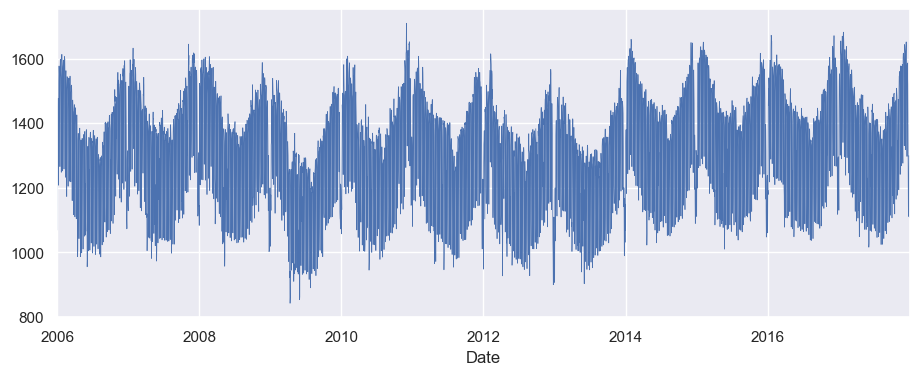

In [20]:
# visualize with seaborn
sns.set(rc={'figure.figsize': (11, 4)})
df['Consumption'].plot(linewidth = 0.5);


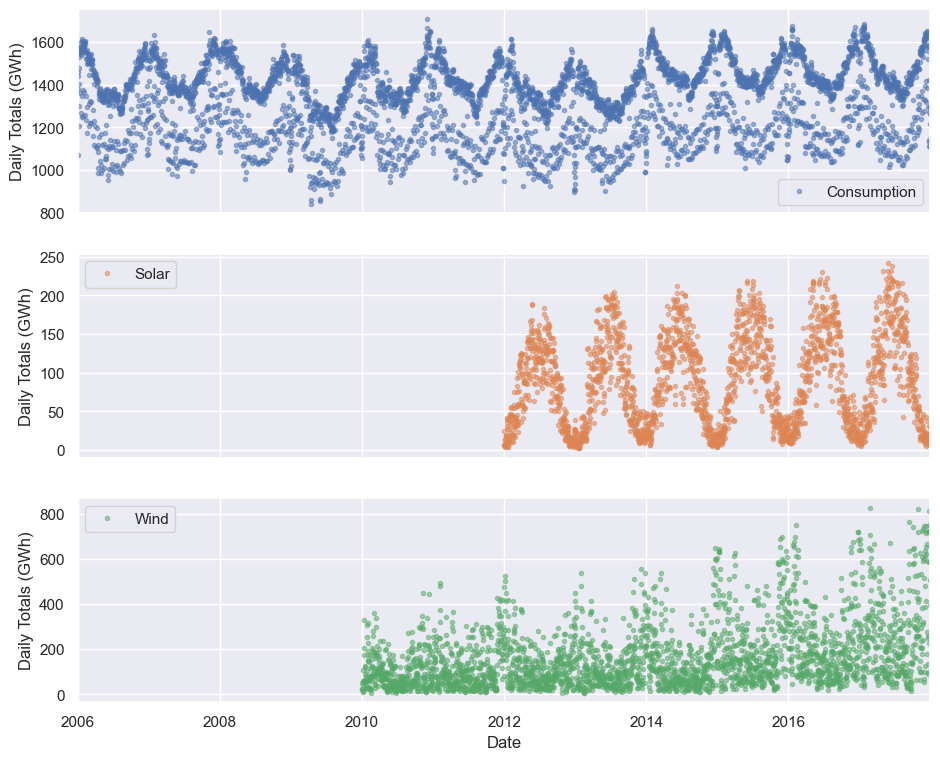

In [21]:
# Visualize each feature with corresponding plots
cols_plot = ['Consumption', 'Solar', 'Wind']
axes = df[cols_plot].plot(marker = '.', alpha = 0.5, linestyle = 'None', figsize = (11, 9), subplots = True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')
plt.show()

Step 4: Seasonality

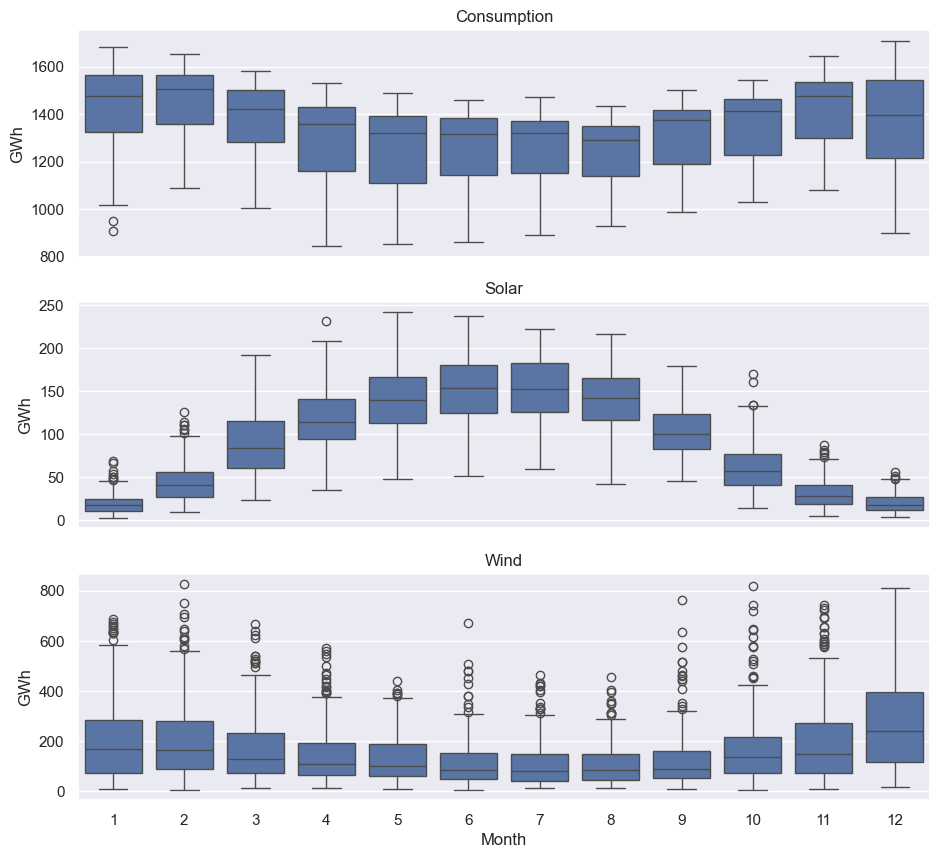

In [22]:
# Draw boxplot to check for seasonality of each feature
fig, axes = plt.subplots(3, 1 ,figsize = (11, 10), sharex = True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
    sns.boxplot(data = df, x='Month', y=name, ax=ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)
    # Remove the automatic x- axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')

Step 5: Frequencies

In [23]:
# Filter date with frequencies
pd.date_range('1998-03-10', '1998-03-15', freq ='D')

DatetimeIndex(['1998-03-10', '1998-03-11', '1998-03-12', '1998-03-13',
               '1998-03-14', '1998-03-15'],
              dtype='datetime64[ns]', freq='D')

In [25]:
# Apply the above function to fill missing data with forward fill (ffill)
times_sample = pd.to_datetime(['2013-02-03', '2013-02-06', '2013-02-08'])

# filter the Consumption value corresponding to dates in time_sample
consum_sample = df.loc[times_sample, ['Consumption']].copy()
consum_sample

,Consumption
2013-02-03,1109.639
2013-02-06,1451.449
2013-02-08,1433.098


In [26]:
# Convert the data to daily frequency, without filling any missings
consum_freq = consum_sample.asfreq('D')

# Create a column with missings forward filled
consum_freq['Consumption - Forward Fill'] = consum_sample.asfreq('D', method ='ffill')
consum_freq

,Consumption,Consumption - Forward Fill
2013-02-03,1109.639,1109.639
2013-02-04,NaN,1109.639
2013-02-05,NaN,1109.639
2013-02-06,1451.449,1451.449
2013-02-07,NaN,1451.449
2013-02-08,1433.098,1433.098


Step 6: Resampling

In [31]:
# Apply resampling to change the frequency within the time-series data

data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
df_weekly_mean = df[data_columns].resample('W').mean()
df_weekly_mean.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN
2006-01-22,1490.031143,NaN,NaN,NaN
2006-01-29,1514.176857,NaN,NaN,NaN


In [32]:
print(df.shape[0])
print(df_weekly_mean.shape[0])

4383
627


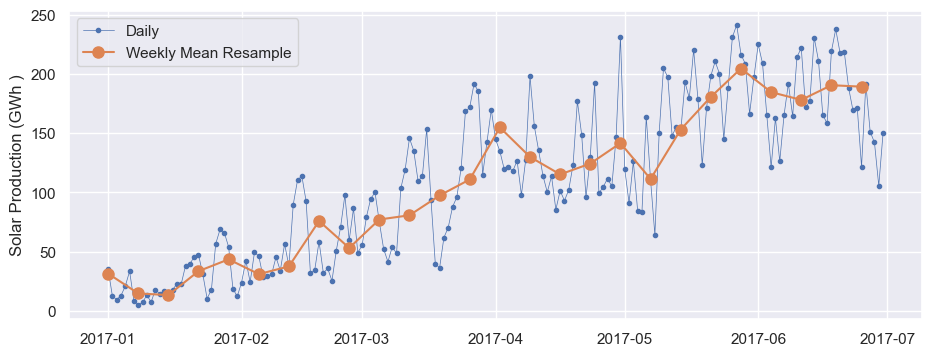

In [33]:
# Visualize data of Solar within 6 months

# Start and end of the date range to extract
start, end = '2017-01', '2017-06'

# Plot daily and weekly resampled time series together
fig, ax = plt.subplots ()
ax.plot(df.loc[start:end, 'Solar'], marker = '.', linestyle = '-', linewidth = 0.5, label = 'Daily')
ax.plot(df_weekly_mean.loc[start:end, 'Solar'], marker ='o', markersize = 8, linestyle = '-', label = 'Weekly Mean Resample')
ax.set_ylabel('Solar Production (GWh )')
ax.legend()
plt.show ()

In [39]:
# Setting min_count when we do sampling to assure that we dont do sampling whenever there are too much Nan values.
opsd_annual = df[data_columns].resample('YE').sum(min_count = 360) # the index will be the last day of each year

# set index to the year of each index
opsd_annual = opsd_annual.set_index(opsd_annual.index.year)
opsd_annual.index.name = 'Year'
opsd_annual['Wind+Solar/Consumption'] = opsd_annual['Wind+Solar'] / opsd_annual['Consumption']
opsd_annual.tail(5)

,Consumption,Wind,Solar,Wind+Solar,Wind+Solar/Consumption
Year,,,,,
2013,463336.85300,47197.832,29559.780,76697.443,0.165533
2014,504164.82100,51107.672,32498.307,83370.502,0.165364
2015,505264.56300,77468.994,34907.138,112376.132,0.222410
2016,505927.35400,77008.126,34562.824,111570.950,0.220528
2017,504736.36939,102667.365,35882.643,138550.008,0.274500


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '2012'),
  Text(1, 0, '2013'),
  Text(2, 0, '2014'),
  Text(3, 0, '2015'),
  Text(4, 0, '2016'),
  Text(5, 0, '2017')])

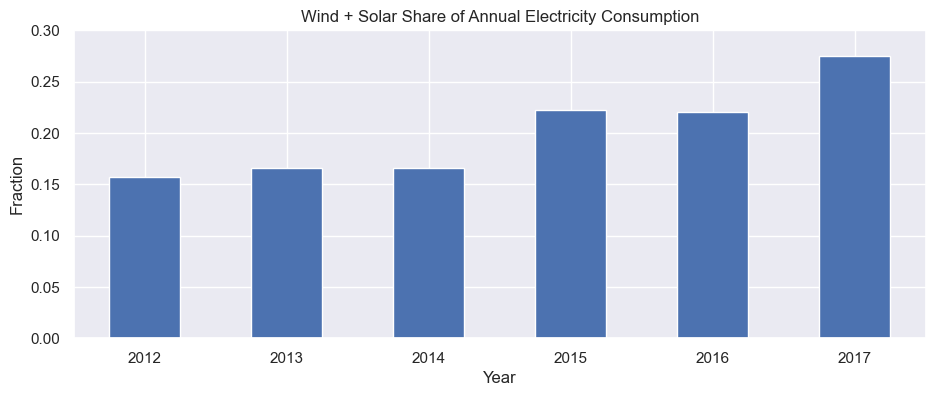

In [40]:
# plot the fraction
ax = opsd_annual.loc[2012:, 'Wind+Solar/Consumption'].plot.bar(color = 'C0')
ax.set_ylabel('Fraction')
ax.set_ylim(0, 0.3)
ax.set_title('Wind + Solar Share of Annual Electricity Consumption')
plt.xticks(rotation = 0)

Step 7: Rolling windows

In [42]:
# Compute the centered 7- day rolling mean
df_7d = df[data_columns].rolling(7, center=True).mean()
df_7d.head(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
2006-01-06,1402.557571,NaN,NaN,NaN
2006-01-07,1421.754429,NaN,NaN,NaN
2006-01-08,1438.891429,NaN,NaN,NaN
2006-01-09,1449.769857,NaN,NaN,NaN


- The mean from 2006-01-01 to 2006-01-07 is assigned to 2006-01-04
- The mean from 2006-01-02 to 2006-01-08 is assigned to 2006-01-05
- The mean from 2006-01-03 to 2006-01-09 is assigned to 2006-01-06
...

Step 8: Trends

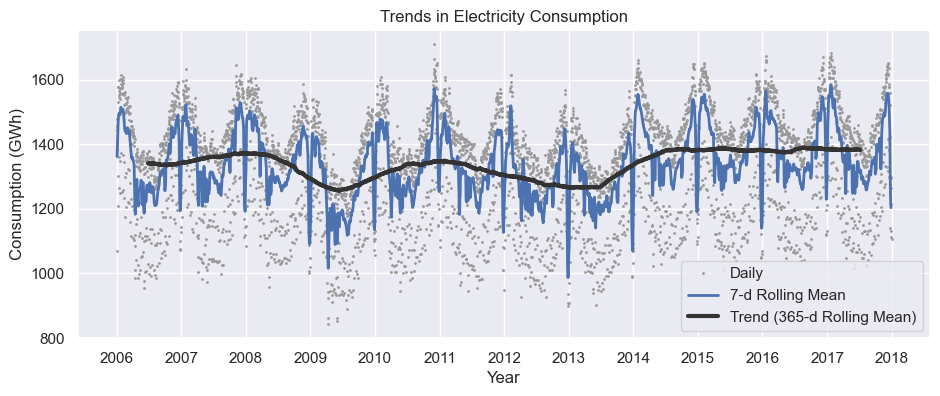

In [43]:
import matplotlib . dates as mdates

# The min_periods =360 argument accounts for a few isolated missing days in the
# wind and solar production time series
df_365d = df[data_columns].rolling(window =365, center = True, min_periods = 360).mean()

# Plot daily, 7 -day rolling mean, and 365 - day rolling mean time series
fig, ax = plt.subplots()
ax.plot(df['Consumption'], marker = '.', markersize = 2, color ='0.6', linestyle = 'None', label = 'Daily')
ax.plot(df_7d['Consumption'] , linewidth = 2 , label = '7-d Rolling Mean')
ax.plot(df_365d['Consumption'], color = '0.2', linewidth = 3, label = 'Trend (365-d Rolling Mean)')

# Set x- ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Trends in Electricity Consumption')
plt.show()

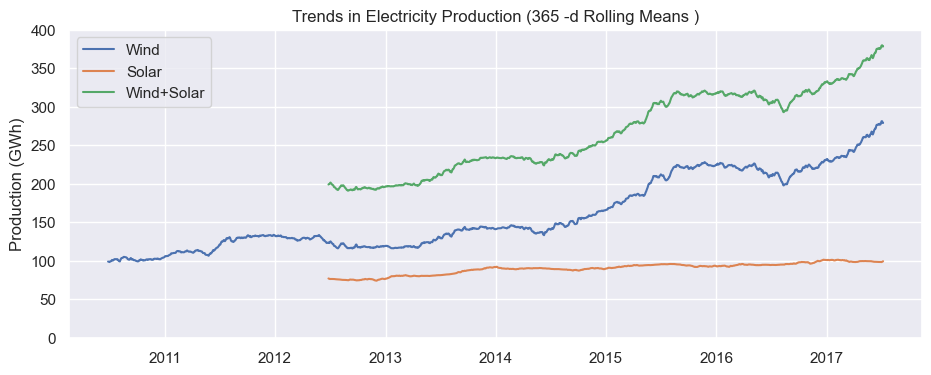

In [44]:
# Plot 365 - day rolling mean time series of wind and solar power
fig, ax = plt.subplots()

for nm in ['Wind', 'Solar', 'Wind+Solar']:
    ax.plot(df_365d[nm], label = nm)
    # Set x- ticks to yearly interval , adjust y- axis limits , add legend and labels
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.set_ylim(0, 400)
    ax.legend()
    ax.set_ylabel('Production (GWh)')
    ax.set_title('Trends in Electricity Production (365 -d Rolling Means )')
plt.show()